Stacking is a machine learning strategy that combines the predictions of numerous base models, also known as first-level models or base learners, to obtain a final prediction. It entails training numerous base models on the same training dataset, then feeding their predictions into a higher-level model, also known as a meta-model or second-level model, to make the final prediction. The main idea behind stacking is to combine the predictions of different base models in order to get more extraordinary predictive performance than utilizing a single model.
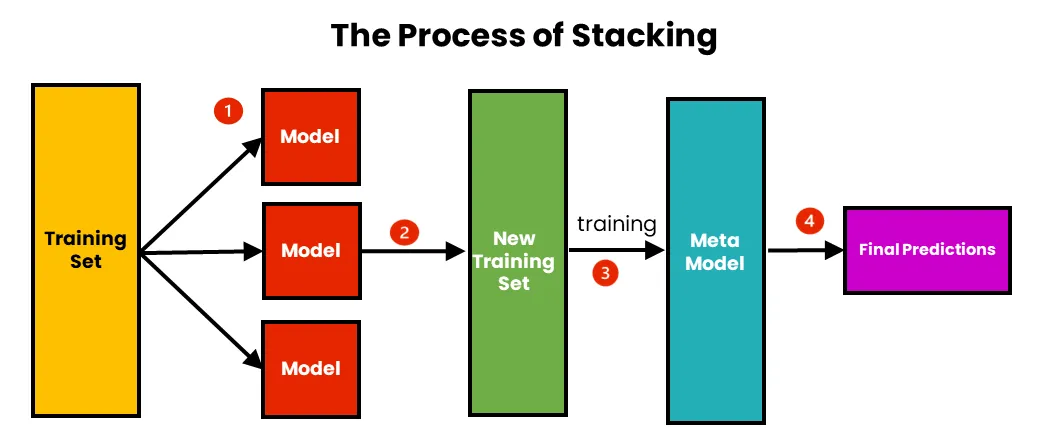
ref- https://medium.com/@brijesh_soni/stacking-to-improve-model-performance-a-comprehensive-guide-on-ensemble-learning-in-python-9ed53c93ce28

In [3]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [4]:
# data preparation
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
stacking_clf = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(probability=True, random_state=42))
    ],
    final_estimator=RandomForestClassifier(random_state=42),
    cv = 3
)

stacking_clf.fit(X, y)

StackingClassifier(cv=3,
                   estimators=[('lr', LogisticRegression(random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('svc', SVC(probability=True, random_state=42))],
                   final_estimator=RandomForestClassifier(random_state=42))

In [8]:
from sklearn.model_selection import cross_val_score

cross_val_score(stacking_clf, X_train, y_train, scoring="accuracy", n_jobs=-1, cv=3)

array([0.912, 0.912, 0.928])

In [9]:
from sklearn.metrics import accuracy_score

y_pred = stacking_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.912